In [1]:
import pandas as pd
import duckdb as db
from dateutil import parser
import numpy as np
from matplotlib import pyplot as plt
import locale
import seaborn as sns

In [2]:
data = pd.read_csv("ecommerce_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        907 non-null    object 
 1   Customer_ID     922 non-null    object 
 2   Product_ID      902 non-null    object 
 3   Product_Name    903 non-null    object 
 4   Category        895 non-null    object 
 5   Price           884 non-null    float64
 6   Quantity        909 non-null    float64
 7   Order_Date      908 non-null    object 
 8   Delivery_Date   807 non-null    object 
 9   Payment_Method  895 non-null    object 
dtypes: float64(2), object(8)
memory usage: 78.3+ KB


Cleansing Data

In [3]:
def conv_tgl(column):
    return column.dropna().map(parser.parse)

In [4]:
item = ['Order_Date', 'Delivery_Date']
data[item] = data[item].apply(conv_tgl)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        907 non-null    object        
 1   Customer_ID     922 non-null    object        
 2   Product_ID      902 non-null    object        
 3   Product_Name    903 non-null    object        
 4   Category        895 non-null    object        
 5   Price           884 non-null    float64       
 6   Quantity        909 non-null    float64       
 7   Order_Date      908 non-null    datetime64[ns]
 8   Delivery_Date   807 non-null    datetime64[ns]
 9   Payment_Method  895 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 78.3+ KB


In [5]:
data_new = data.dropna()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        369 non-null    object        
 1   Customer_ID     369 non-null    object        
 2   Product_ID      369 non-null    object        
 3   Product_Name    369 non-null    object        
 4   Category        369 non-null    object        
 5   Price           369 non-null    float64       
 6   Quantity        369 non-null    float64       
 7   Order_Date      369 non-null    datetime64[ns]
 8   Delivery_Date   369 non-null    datetime64[ns]
 9   Payment_Method  369 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 31.7+ KB


In [6]:
data_new.head()

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Price,Quantity,Order_Date,Delivery_Date,Payment_Method
0,48ca9641-6d4c-4f39-b2e9-bf2e64eb97d8,76c18b23-a7d5-4b66-adaa-7aa143af36be,e19cbae9-8203-46ab-a8c8-5933dd0078ba,in,recognize,164.29,6.0,2020-08-26,2020-08-26,Credit Card
8,26f29160-9f9a-4924-8d29-1a365e92c853,5a098d7e-d35a-4592-b4a9-881eb627b870,6a471783-05e4-4743-8cb7-c8ec7d514a9b,take,event,136.01,9.0,2022-02-21,2022-02-24,Cash
9,46dea4b6-3e1e-4f6a-a29a-1e88eaf4c762,d729fa92-0909-4b06-b125-bf4a9de378dd,c39ca2fb-9462-45f3-9fd7-f9f60818bbd0,while,build,962.10,7.0,2021-10-03,2021-10-05,Cash
10,a499504f-687a-4f88-aeda-bf3c401ca168,ac04d16c-dc58-4197-a45d-85b16be5dc46,d82c9e95-99fc-4520-b72b-a554da58889b,before,theory,547.22,9.0,2021-12-29,2022-01-06,Cash
16,89a6d123-a260-460e-a70a-852d9f306750,6ccc37b5-878d-429f-8104-f368a54908e8,a5db15f9-097a-4fb8-b7b9-c2fc08da3650,hair,yes,117.30,7.0,2021-04-11,2021-04-11,Credit Card


In [7]:
data_new.reset_index(drop=True, inplace=True)
data_new.head()

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Price,Quantity,Order_Date,Delivery_Date,Payment_Method
0,48ca9641-6d4c-4f39-b2e9-bf2e64eb97d8,76c18b23-a7d5-4b66-adaa-7aa143af36be,e19cbae9-8203-46ab-a8c8-5933dd0078ba,in,recognize,164.29,6.0,2020-08-26,2020-08-26,Credit Card
1,26f29160-9f9a-4924-8d29-1a365e92c853,5a098d7e-d35a-4592-b4a9-881eb627b870,6a471783-05e4-4743-8cb7-c8ec7d514a9b,take,event,136.01,9.0,2022-02-21,2022-02-24,Cash
2,46dea4b6-3e1e-4f6a-a29a-1e88eaf4c762,d729fa92-0909-4b06-b125-bf4a9de378dd,c39ca2fb-9462-45f3-9fd7-f9f60818bbd0,while,build,962.10,7.0,2021-10-03,2021-10-05,Cash
3,a499504f-687a-4f88-aeda-bf3c401ca168,ac04d16c-dc58-4197-a45d-85b16be5dc46,d82c9e95-99fc-4520-b72b-a554da58889b,before,theory,547.22,9.0,2021-12-29,2022-01-06,Cash
4,89a6d123-a260-460e-a70a-852d9f306750,6ccc37b5-878d-429f-8104-f368a54908e8,a5db15f9-097a-4fb8-b7b9-c2fc08da3650,hair,yes,117.30,7.0,2021-04-11,2021-04-11,Credit Card


In [8]:
def query(sql_query:str) -> pd.DataFrame:
    return db.sql(sql_query).df()

Rata-Rata Harga Produk yang Terjual

In [9]:
x = query('''SELECT * FROM data_new''')
x["Price/pcs"] = (x["Price"]/x["Quantity"]).round(2)

In [10]:
avg = data_new['Price'].mean()
avg_pcs = query('SELECT AVG("Price/pcs") AS Avg FROM x')

print(f'Rata-rata harga produk yang terjual pada dataset sebesar {avg}')
print(f'Rata-rata harga produk per-pcs yang terjual pada dataset sebesar {avg_pcs['Avg'][0]}')

Rata-rata harga produk yang terjual pada dataset sebesar 532.150135501355
Rata-rata harga produk per-pcs yang terjual pada dataset sebesar 165.04382113821143


In [11]:
x.describe()

,Price,Quantity,Order_Date,Delivery_Date,Price/pcs
count,369.000000,369.000000,369,369,369.000000
mean,532.150136,5.409214,2021-10-25 10:43:54.146341376,2021-10-30 02:16:35.121951488,165.043821
min,10.260000,1.000000,2020-01-06 00:00:00,2020-01-08 00:00:00,1.380000
25%,323.360000,3.000000,2020-11-11 00:00:00,2020-11-15 00:00:00,50.570000
50%,521.090000,5.000000,2021-10-29 00:00:00,2021-11-02 00:00:00,98.260000
75%,792.770000,8.000000,2022-09-23 00:00:00,2022-09-30 00:00:00,200.260000
max,998.560000,10.000000,2023-11-26 00:00:00,2023-12-02 00:00:00,998.560000
std,280.721016,2.917902,NaN,NaN,187.403954


Total Produk Penjualan Tertinggi

In [12]:
#high_item =  x[x['Quantity'] == x['Quantity'].max()][['Product_Name', 'Quantity']]
high_item = query('''SELECT Product_Name, Quantity
                  FROM x
                  WHERE Quantity = (
                        SELECT MAX(Quantity) FROM data_new )''')
high_item.tail()

,Product_Name,Quantity
32,until,10.0
33,manager,10.0
34,my,10.0
35,during,10.0
36,north,10.0


In [13]:
count_dupl = len(high_item)
count = high_item.value_counts()
count_free = len(count)

print(f'Total produk yang terjual dengan jumlah (Quantity) tertinggi ada {count_dupl} produk')
print(f'Dengan satu produk terjual sebanyak {count.values[0]}x, produk tersebut adalah "{count.index[0][0]}", yang terjual sebanyak {high_item.query('Product_Name == "star"').sum()['Quantity']} item')
print(f'Sedangkan {count_free} produk lainnya, sama-sama terjual sebanyak {high_item['Quantity'][0]} item')

Total produk yang terjual dengan jumlah (Quantity) tertinggi ada 37 produk
Dengan satu produk terjual sebanyak 2x, produk tersebut adalah "star", yang terjual sebanyak 20.0 item
Sedangkan 36 produk lainnya, sama-sama terjual sebanyak 10.0 item


Kategori Produk yang Memiliki Harga Tertinggi

In [14]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in x.iloc[:, np.r_[5:7, 10]]])

y = query(f'''SELECT Category, {sum_col}
            FROM x GROUP BY Category
            ORDER BY Category''')

In [15]:
#Price tertinggi
y[y['Price'] == y['Price'].max()]

,Category,Price,Quantity,Price/pcs
3,address,2574.67,14.0,1138.45


In [16]:
#Price/pcs tertinggi
y[y['Price/pcs'] == y['Price/pcs'].max()]

,Category,Price,Quantity,Price/pcs
169,nation,1577.96,3.0,1270.87


In [17]:
#Quantity tertinggi
query("""SELECT * FROM y
        WHERE Quantity = (SELECT MAX(Quantity) FROM y)""")

,Category,Price,Quantity,Price/pcs
0,quality,2154.29,28.0,332.5


In [18]:
y.describe()

,Price,Quantity,Price/pcs
count,301.000000,301.000000,301.000000
mean,652.370100,6.631229,202.329468
std,402.410938,4.382566,226.151680
min,10.260000,1.000000,2.220000
25%,368.170000,3.000000,63.980000
50%,616.020000,6.000000,121.040000
75%,867.790000,9.000000,233.040000
max,2574.670000,28.000000,1270.870000


Perkembangan Penjualan -> Tahunan, Bulanan, Harian

In [19]:
count_year = query('''SELECT YEAR(Order_Date) AS Year, MONTH(Order_Date) AS Month, COUNT(order_ID) AS "Sales Volume"
                FROM x GROUP BY YEAR(Order_Date), MONTH(Order_Date)
                ORDER BY YEAR(Order_Date), MONTH(Order_Date)''')
                
y_2020 = count_year.query("Year == 2020")
y_2021 = count_year.query("Year == 2021")
y_2022 = query("SELECT * FROM count_year WHERE Year = 2022")
y_2023 = query("SELECT * FROM count_year WHERE Year = 2023")

In [20]:
year_dict = {}

for year in count_year['Year'].unique():
    year_values = count_year[count_year['Year'] == year]['Sales Volume'].sum()
    year_dict[year] = year_values.tolist()

year = pd.DataFrame(list(year_dict.items()), columns=['Year', 'Sales Volume'])
year

,Year,Sales Volume
0,2020,106
1,2021,100
2,2022,97
3,2023,66


In [21]:
month = query('''SELECT Month, SUM("Sales Volume") AS "Sales Volume" FROM count_year
                GROUP BY Month ORDER BY Month''')   #kalo mau spesifik tahun, tinggal ditambahin where year
month

,Month,Sales Volume
0,1,41.0
1,2,30.0
2,3,31.0
3,4,30.0
4,5,27.0
5,6,34.0
6,7,31.0
7,8,31.0
8,9,23.0
9,10,31.0


In [22]:
locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')
x['Day'] = x['Order_Date'].dt.strftime('%A')
x = x.sort_values(by='Order_Date')

In [23]:
day = query(f'''SELECT Day, COUNT(order_ID) AS "Sales Volume" FROM x            
            GROUP BY Day
            ORDER BY 
                CASE
                    WHEN Day = 'Minggu' THEN 7
                    WHEN Day = 'Senin' THEN 1
                    WHEN Day = 'Selasa' THEN 2
                    WHEN Day = 'Rabu' THEN 3
                    WHEN Day = 'Kamis' THEN 4
                    WHEN Day = 'Jumat' THEN 5
                    WHEN Day = 'Sambtu' THEN 6
                END''')
day

,Day,Sales Volume
0,Senin,55
1,Selasa,48
2,Rabu,53
3,Kamis,57
4,Jumat,59
5,Minggu,57
6,Sabtu,40


In [24]:
def grafik_type(tipe, judul:str):
    x = tipe.columns[0]
    
    plt.plot(tipe[x], tipe['Sales Volume'], marker='o')
    plt.title(f'{judul}an')
    plt.xticks(tipe[x])
    plt.xlabel(judul)
    plt.ylabel('Jumlah Pemesanan')
    plt.grid(True) 

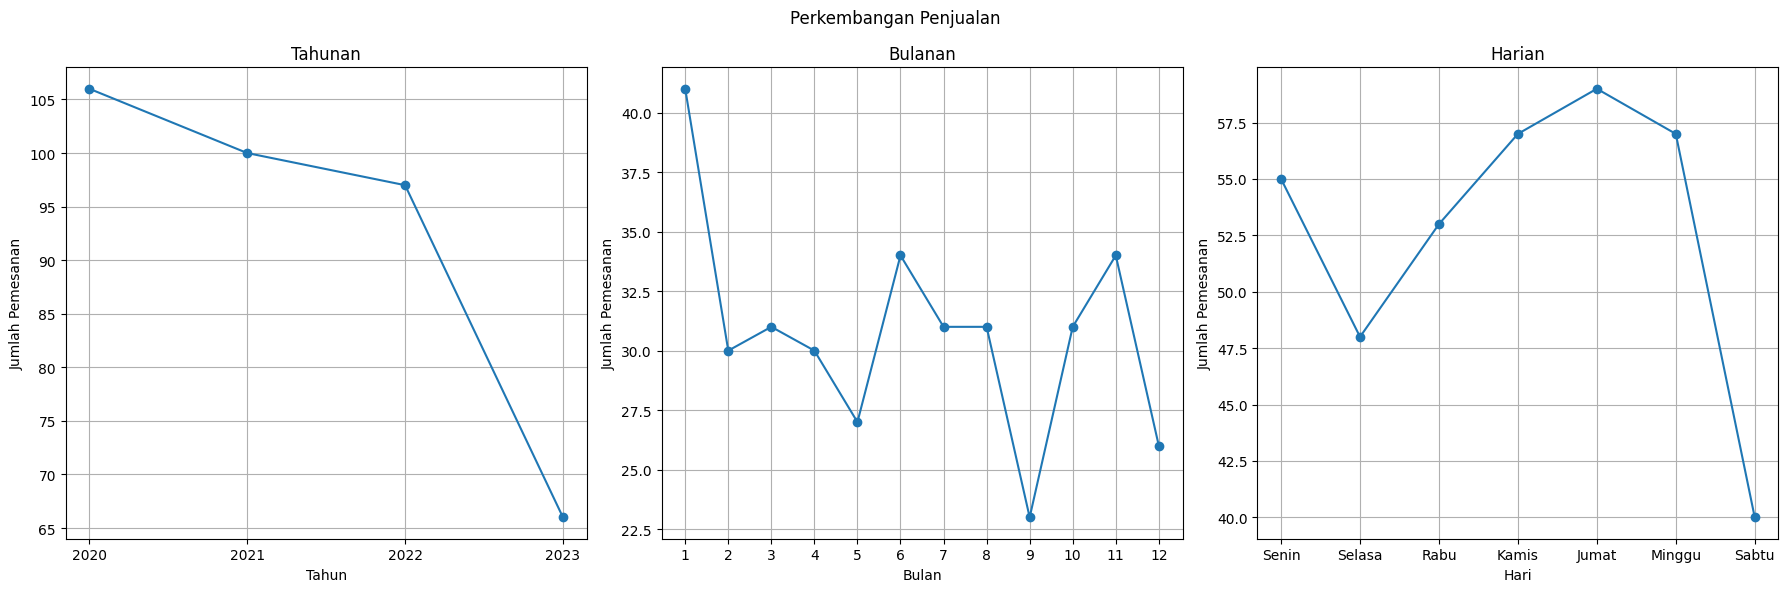

In [25]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1) 
grafik_type(year, 'Tahun')

plt.subplot(1,3,2) 
grafik_type(month, 'Bulan')

plt.subplot(1,3,3) 
grafik_type(day, 'Hari')

plt.suptitle('Perkembangan Penjualan')
plt.tight_layout()
plt.show()

In [26]:
def grafik_tahunan(year):
    x = eval(f'y_{year}')
    
    plt.plot(x['Month'], x['Sales Volume'], marker='o')
    plt.title(year)
    plt.xticks(x['Month'])
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Pemesanan')
    plt.grid(True)

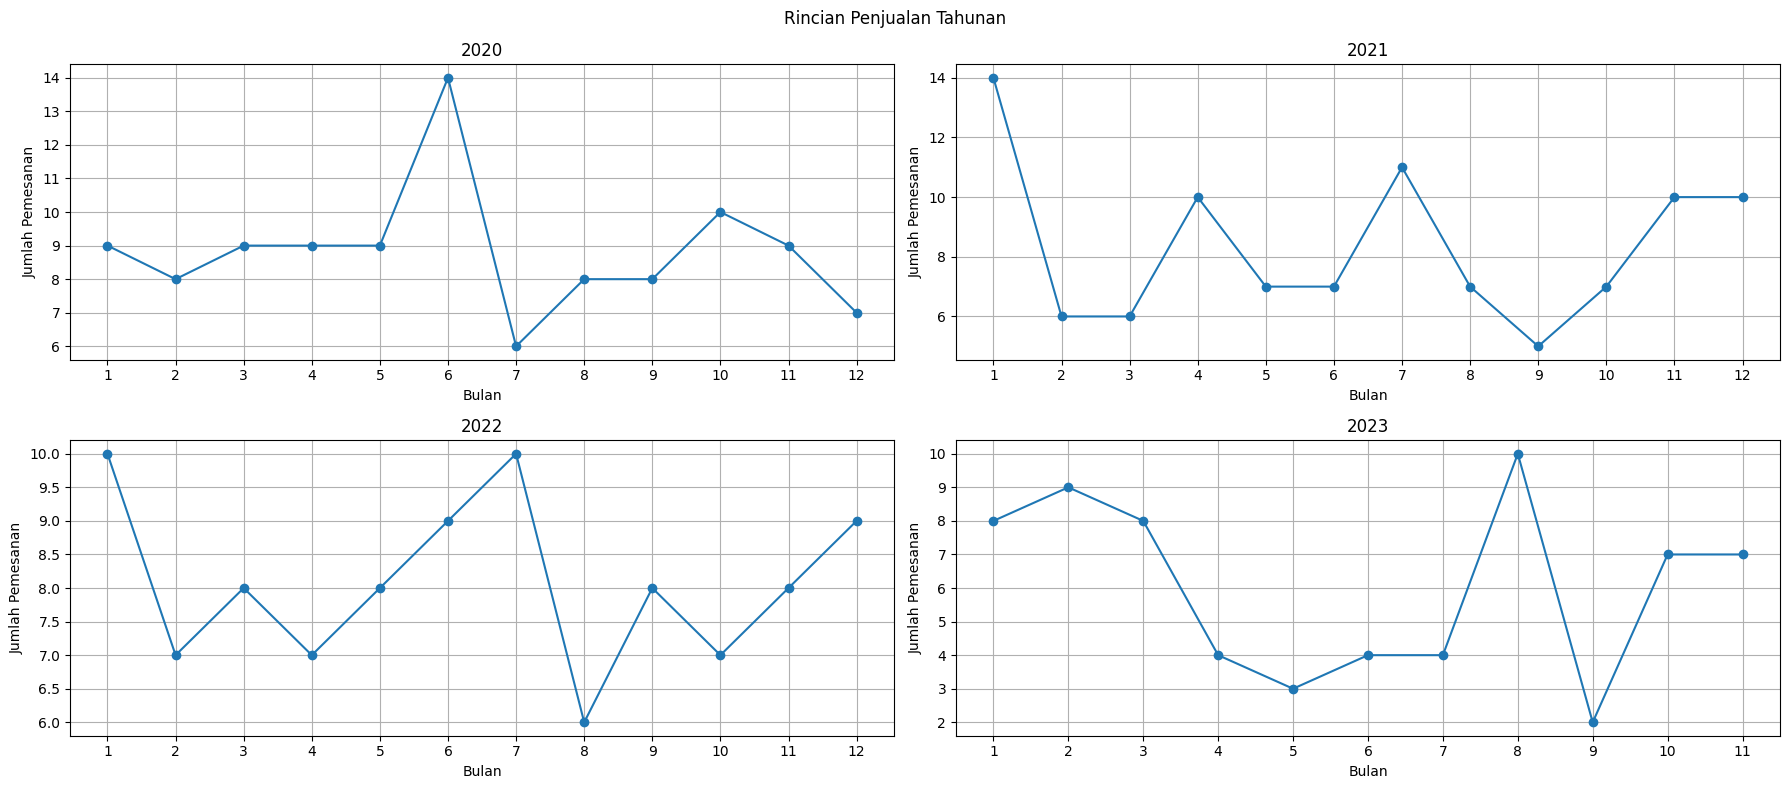

In [27]:
plt.figure(figsize=(18, 8))

plt.subplot(2,2,1) 
grafik_tahunan(2020)

plt.subplot(2,2,2) 
grafik_tahunan(2021)

plt.subplot(2,2,3) 
grafik_tahunan(2022)

plt.subplot(2,2,4) 
grafik_tahunan(2023)

plt.suptitle('Rincian Penjualan Tahunan')
plt.tight_layout()
plt.show()

Pola Penjualan dalam Seminggu

In [28]:
def_date = x['Order_Date'].min().day
def_date_7 = def_date + 6

z_copy = query(f'''SELECT YEAR(Order_Date) AS Year, MONTH(Order_Date) AS Month, DAY(Order_Date) AS Day, 
            COUNT(order_ID) AS "Sales Volume" FROM x 
            WHERE YEAR(Order_Date) == (2020) AND MONTH(Order_Date) == 01
            AND DAY(Order_Date) BETWEEN {def_date} AND {def_date_7}
            GROUP BY YEAR(Order_Date), MONTH(Order_Date), DAY(Order_Date)
            ORDER BY YEAR(Order_Date), MONTH(Order_Date), DAY(Order_Date)''')
z_copy

,Year,Month,Day,Sales Volume
0,2020,1,6,1
1,2020,1,8,1
2,2020,1,11,1
3,2020,1,12,1


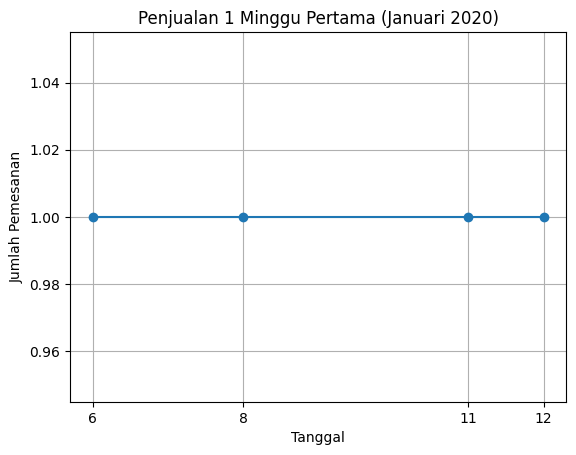

In [29]:
plt.plot(z_copy['Day'], z_copy['Sales Volume'], marker='o')

plt.title('Penjualan 1 Minggu Pertama (Januari 2020)')
plt.xticks(z_copy['Day'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pemesanan')
plt.grid(True)

plt.show()

Analisis Statistik Objek pada Data

In [30]:
x.describe(include=[object])

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Payment_Method,Day
count,369,369,369,369,369,369,369
unique,369,369,369,308,301,3,7
top,1c2a109c-01b4-4c16-a246-19ef3987b20a,3a1284d1-37b9-4a09-b590-3f94bd062e4c,b3615176-237f-4fb5-adf5-b5ac7843f434,hair,quality,Credit Card,Jumat
freq,1,1,1,3,4,131,59


Korelasi Metode Pembayaran dan Total Belanja

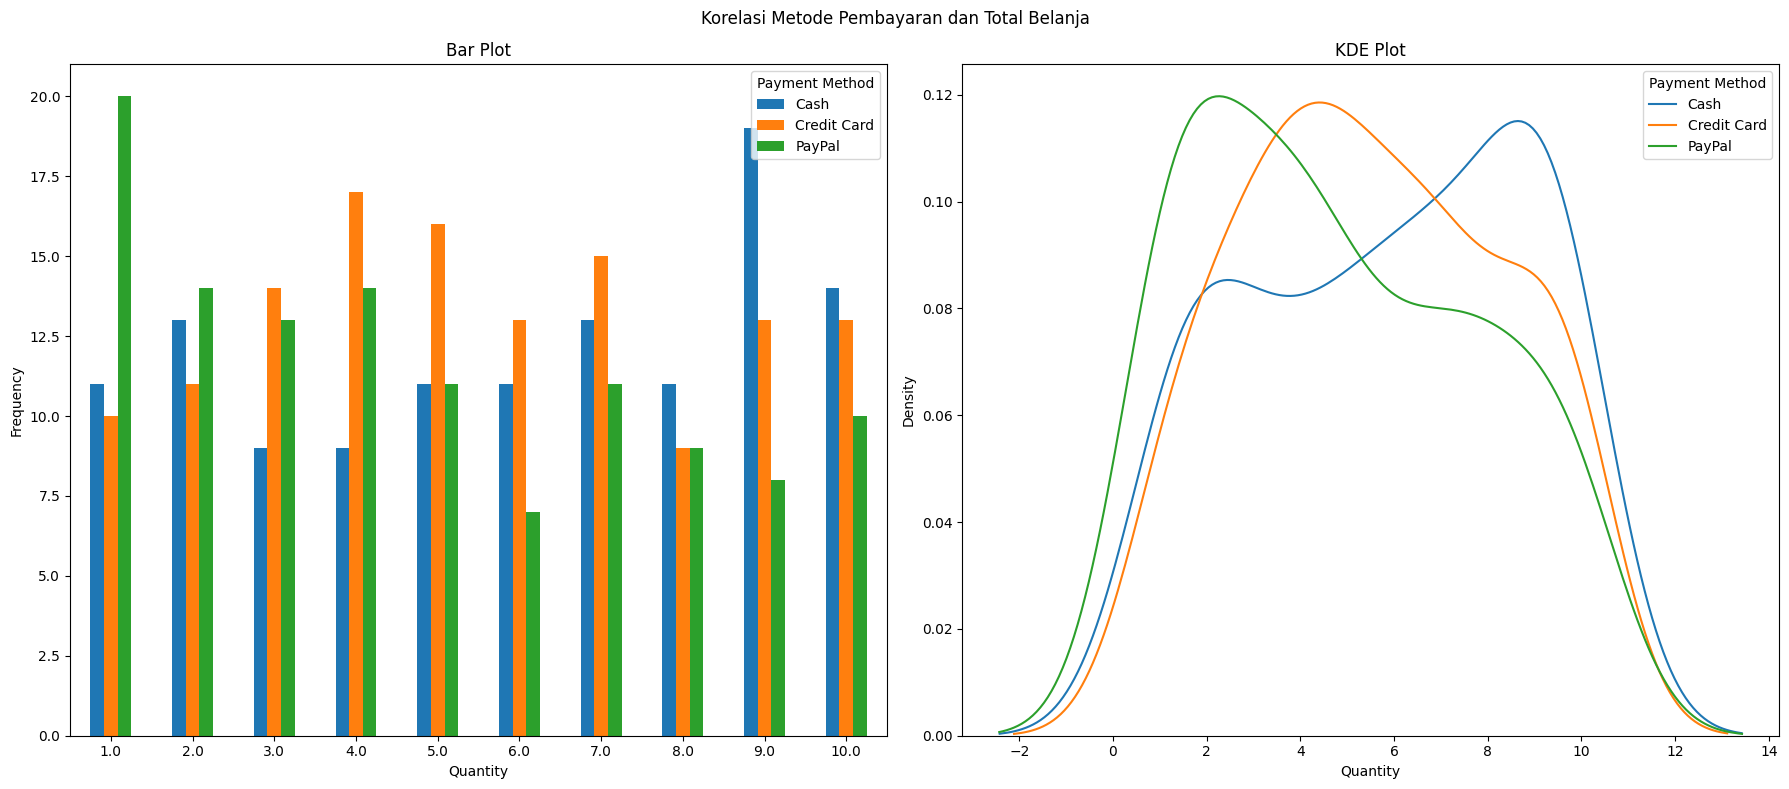

In [31]:
counts = x.groupby(['Quantity', 'Payment_Method']).size().unstack()
plt.figure(figsize=(18, 8))

ax1 = plt.subplot(1, 2, 1)
counts.plot(kind='bar', stacked=False, ax=ax1)
plt.xticks(range(len(counts.index)), counts.index, rotation=0, ha='center')
plt.legend(title='Payment Method', loc='upper right')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Bar Plot')

ax2 = plt.subplot(1, 2, 2)
for method in counts.columns:
    sns.kdeplot(x[x['Payment_Method'] == method]['Quantity'], ax=ax2, label=f'{method}')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.legend(title='Payment Method', loc='upper right')

plt.suptitle('Korelasi Metode Pembayaran dan Total Belanja')
plt.tight_layout()
plt.show()

Presentase Keterlambatan Pengiriman Pesanan

In [32]:
x['Status'] = (x['Delivery_Date'] - x['Order_Date']).dt.days.apply(lambda x: 'Terlambat' if x > 3 else 'Aman')

In [33]:
stat = query('''SELECT Status, COUNT(Status) AS Total FROM x
                GROUP BY Status ORDER BY Status''')

a = stat.loc[stat['Status'] == 'Terlambat', 'Total'].values[0]
a = (a/len(x['Status']))*100

print(f'Presentase keterlambatan pengiriman pesanan (>3 hari) adalah sebesar {a.round(2)}%')

Presentase keterlambatan pengiriman pesanan (>3 hari) adalah sebesar 61.25%


Pola Keterlambatan Pengiriman Pesanan -> Tahunan, Bulanan, Harian

In [34]:
count_year_copy = query('''SELECT YEAR(Order_Date) AS Year, MONTH(Order_Date) AS Month, COUNT(Status) AS "Jumlah Keterlambatan"
                    FROM x WHERE Status = 'Terlambat'
                    GROUP BY YEAR(Order_Date), MONTH(Order_Date)
                    ORDER BY YEAR(Order_Date), MONTH(Order_Date)''')
                    
y_2020_copy = query("SELECT * FROM count_year_copy WHERE Year = 2020")
y_2021_copy = query("SELECT * FROM count_year_copy WHERE Year = 2021")
y_2022_copy = query("SELECT * FROM count_year_copy WHERE Year = 2022")
y_2023_copy = query("SELECT * FROM count_year_copy WHERE Year = 2023")

In [35]:
year_dict_copy = {}

for year in count_year_copy['Year'].unique():
    year_values = count_year_copy[count_year_copy['Year'] == year]['Jumlah Keterlambatan'].sum()
    year_dict_copy[year] = year_values.tolist()

year_copy = pd.DataFrame(list(year_dict_copy.items()), columns=['Year', 'Jumlah Keterlambatan'])
year_copy

,Year,Jumlah Keterlambatan
0,2020,58
1,2021,67
2,2022,57
3,2023,44


In [36]:
month_copy = query('''SELECT Month, SUM("Jumlah Keterlambatan") AS "Jumlah Keterlambatan" FROM count_year_copy
                    GROUP BY Month ORDER BY Month''')   #kalo mau spesifik tahun, tinggal ditambahin where year
month_copy                    

,Month,Jumlah Keterlambatan
0,1,30.0
1,2,18.0
2,3,20.0
3,4,14.0
4,5,18.0
5,6,18.0
6,7,15.0
7,8,16.0
8,9,13.0
9,10,20.0


In [37]:
day_copy = query(f'''SELECT Day, COUNT(Status) AS "Jumlah Keterlambatan" FROM x     
            WHERE Status = 'Terlambat'       
            GROUP BY Day
            ORDER BY 
                CASE
                    WHEN Day = 'Minggu' THEN 7
                    WHEN Day = 'Senin' THEN 1
                    WHEN Day = 'Selasa' THEN 2
                    WHEN Day = 'Rabu' THEN 3
                    WHEN Day = 'Kamis' THEN 4
                    WHEN Day = 'Jumat' THEN 5
                    WHEN Day = 'Sambtu' THEN 6
                END''') #kalo mau spesifik tahun, tinggal ditambahin where year        
day_copy

,Day,Jumlah Keterlambatan
0,Senin,29
1,Selasa,29
2,Rabu,34
3,Kamis,31
4,Jumat,41
5,Minggu,34
6,Sabtu,28


In [38]:
def grafik_type_copy(tipe, judul:str):
    tipe = eval(f'{tipe}_copy')
    x = tipe.columns[0]
    
    plt.plot(tipe[x], tipe['Jumlah Keterlambatan'], marker='o')
    plt.title(f'{judul}an')
    plt.xticks(tipe[x])
    plt.xlabel(judul)
    plt.ylabel('Jumlah Pemesanan')
    plt.grid(True) 

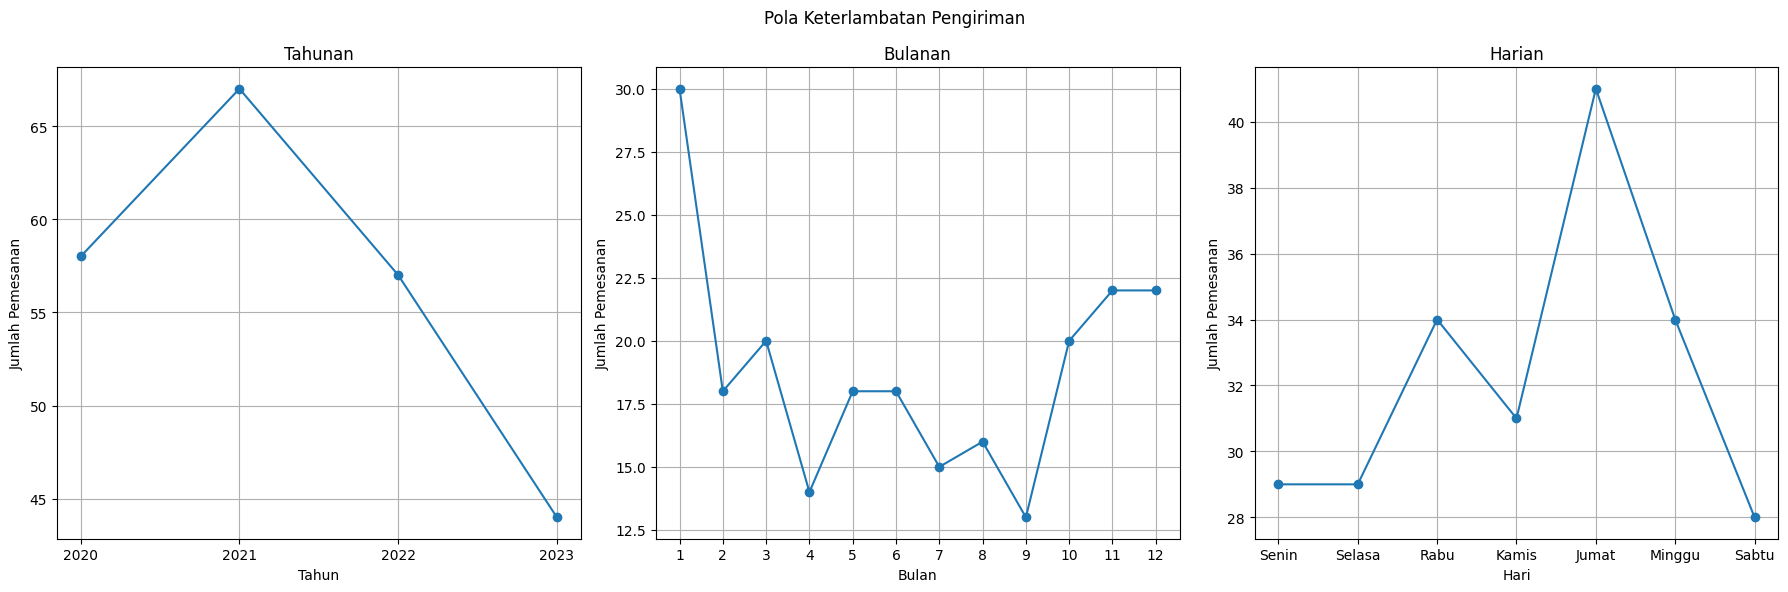

In [39]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1) 
grafik_type_copy('year', 'Tahun')

plt.subplot(1,3,2) 
grafik_type_copy('month', 'Bulan')

plt.subplot(1,3,3) 
grafik_type_copy('day', 'Hari')

plt.suptitle('Pola Keterlambatan Pengiriman')
plt.tight_layout()
plt.show()

In [40]:
def grafik_tahunan_copy(year):
    x = eval(f'y_{year}_copy')
    
    plt.plot(x['Month'], x['Jumlah Keterlambatan'], marker='o')
    plt.title(year)
    plt.xticks(x['Month'])
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Pemesanan')
    plt.grid(True)

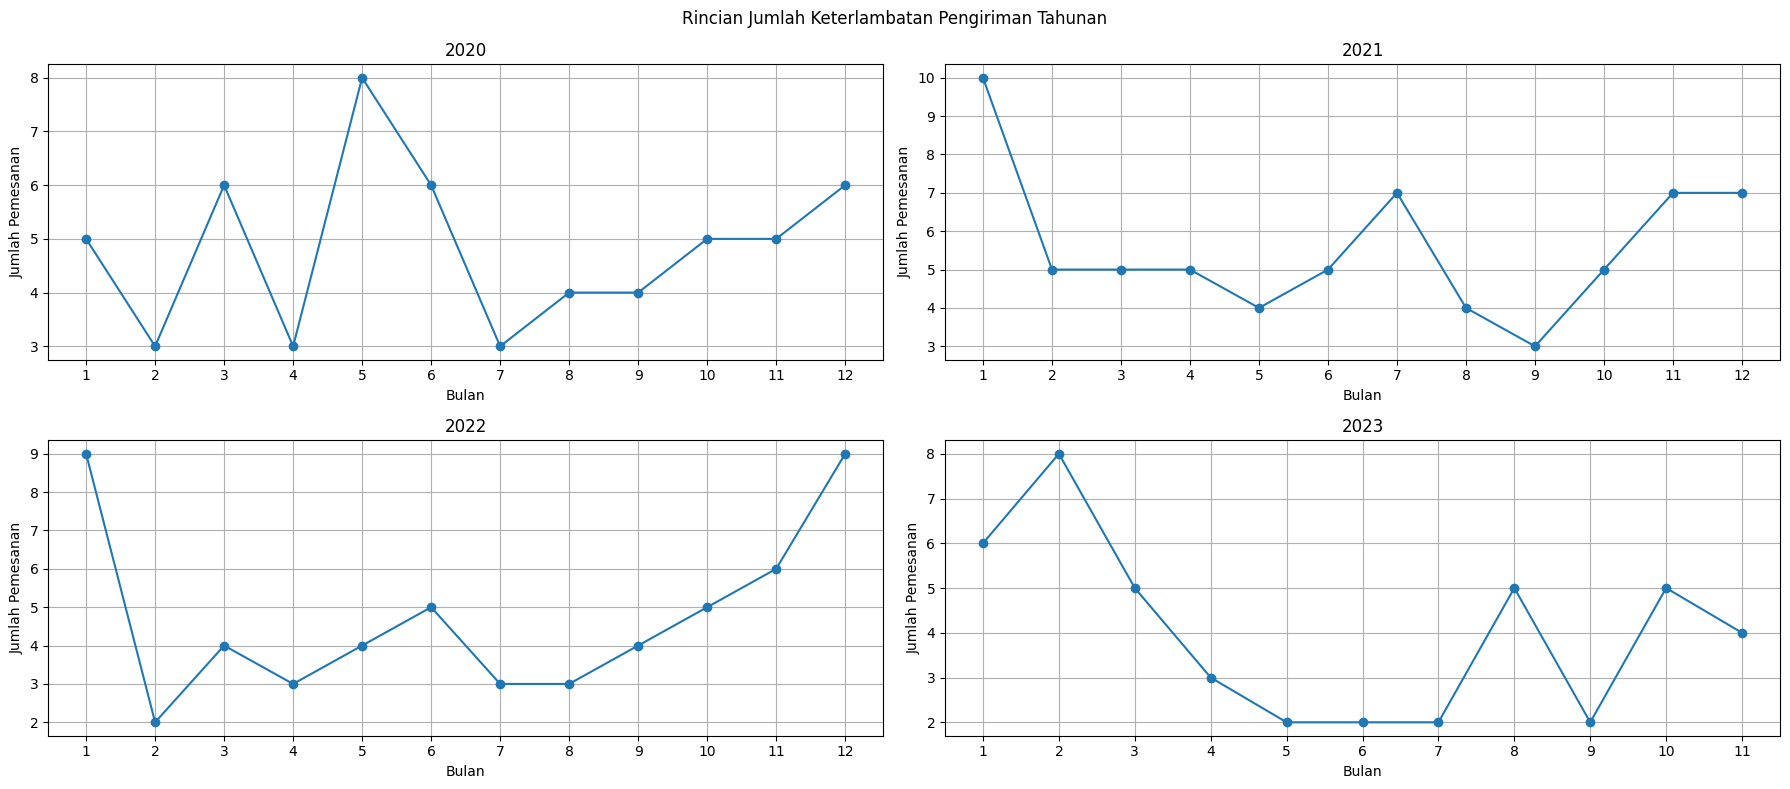

In [41]:
plt.figure(figsize=(18, 8))

plt.subplot(2,2,1) 
grafik_tahunan_copy(2020)

plt.subplot(2,2,2) 
grafik_tahunan_copy(2021)

plt.subplot(2,2,3) 
grafik_tahunan_copy(2022)

plt.subplot(2,2,4) 
grafik_tahunan_copy(2023)

plt.suptitle('Rincian Jumlah Keterlambatan Pengiriman Tahunan')
plt.tight_layout()
plt.show()